In [1]:
def my_max(nums):
    current_max = 0
    for num in nums:
        if current_max < num:
            current_max = num
    return current_max;

def my_min(nums):
    current_min = 0
    for num in nums:
        if current_min > num:
            current_min = num
    return current_min

def my_avg(nums):
    ans = 0
    for num in nums:
        ans += num
    return ans / len(nums)

In [1]:
import sqlite3

db = sqlite3.connect("./citibike.db")

In [19]:
import pandas as pd

def Q(sql):
    pd.read_sql_query(sql, db, chunksize = 100_000)    

In [18]:
Q("""
    SELECT bikeid, SUM(tripduration)
    FROM tripdata
    GROUP BY bikeid
    ORDER BY 2
""")

In [21]:
Q("""
   SELECT
      bikeid,
      SUM(tripduration)/60/60 as hours,
      ROUND(SUM(tripduration)/60/60 / 100) * 100 AS hour_bucket
   FROM
      tripdata
   GROUP BY bikeid
   ORDER BY 2
""")

In [27]:
pd.read_sql_query("""
   SELECT
      bikeid,
      SUM(tripduration)/60/60 as hours,
      ROUND(SUM(tripduration)/60/60 / 100) * 100 AS hour_bucket
   FROM
      tripdata
   GROUP BY bikeid
   ORDER BY 2
""", db, chunksize = 100_000)

In [38]:
Q("""
   SELECT bikeid, starttime, stoptime FROM tripdata LIMIT 10
""")

In [42]:
Q("SELECT bikeid, SUBSTR(starttime, 6, 2) AS m, SUM(tripduration)/3600 AS Total FROM tripdata GROUP BY bikeid, m ORDER BY Total")

In [47]:
# 자전거 id별 6/7/8 월에 대한 사용 통계를 나타내시오.
Q("""
    SELECT 
        bikeid,
        SUM(CASE WHEN m='06' THEN Total END) AS jun,
        SUM(CASE WHEN m='07' THEN Total END) AS jul,
        SUM(CASE WHEN m='08' THEN Total END) AS aug
    FROM
        (SELECT 
            bikeid, 
            SUBSTR(starttime, 6, 2) AS m, 
            SUM(tripduration)/3600 AS Total 
        FROM 
            tripdata 
        GROUP BY 
            bikeid, m 
        ORDER BY 
            Total)
""")

In [54]:
Q("""
SELECT
   start_station_name,
   male / (male + female) * 100 AS "%male"
FROM
(
    SELECT
       start_station_name, 
       SUM(CASE WHEN gender=1 THEN 1 ELSE 0 END) AS male,
       SUM(CASE WHEN gender=2 THEN 1 ELSE 0 END) AS female
    FROM tripdata
    GROUP BY 1
)
WHERE male > 10 AND female > 10
ORDER BY 2
""")

In [65]:
# 각 대여소별, (5살 단위) 나이별 / 시간대별 / 성별 통계를 구하시오
# 1번가 5~10, 10~15, 15~20, 20~25, 대여시간.. 8시 9시 10시... . 남/여
Q("""
SELECT
   start_station_name,
   male / (male + female) * 100 AS "%male"
FROM
(
    SELECT
       start_station_name, 
       SUM(CASE WHEN gender=1 THEN 1 ELSE 0 END) AS male,
       SUM(CASE WHEN gender=2 THEN 1 ELSE 0 END) AS female
    FROM tripdata
    GROUP BY 1
)
ORDER BY 2 DESC
""")

In [20]:
Q("""
   SELECT
      start_station_name,
      ROUND((2017 - birth_year) *5) / 5 AS age_group,
      SUBSTR(starttime, 12, 2) AS h,
      SUM(CASE WHEN gender=1 THEN 1 ELSE 0 END) AS male,
      SUM(CASE WHEN gender=2 THEN 1 ELSE 0 END) AS female
   FROM
      tripdata
   WHERE birth_year > 0
   GROUP BY 1, 2, 3
""")


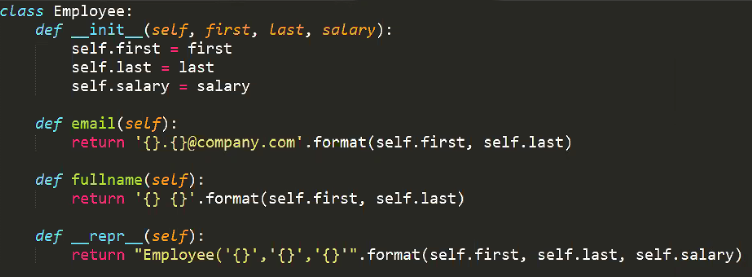